In [5]:
# libs
import cv2
from emnist import extract_training_samples,extract_test_samples

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [7]:
def img_to_data(src,n):
    originalImage = cv2.imread(src)
    grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(grayImage, (n,n))
    rescaledImage = 16 - resizedImage*(16/255)
    return rescaledImage

def show_char(d):
    plt.imshow(d, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

alphabet = np.array(["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
def alph_res(pred):
    return (alphabet[pred == max(pred)])

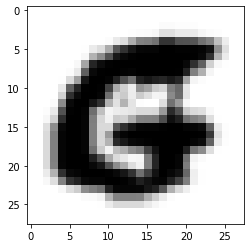

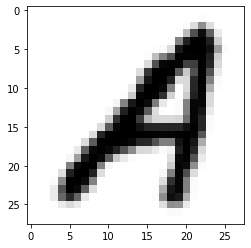

In [9]:
# data - letters
images, labels = extract_training_samples('letters')
t_images, t_labels = extract_test_samples('letters')
reshapedImages = images.reshape( (images.shape[0], 28*28))
labels_binary = to_categorical(labels - 1)


show_char(images[1])
show_char(t_images[1])

In [22]:
# model - letters
n_cols = len(reshapedImages[1])

model = Sequential()
model.add(Dense(784, activation="relu", input_shape = (n_cols,)))
model.add(Dense(1000, activation="relu", input_shape = (n_cols,)))
model.add(Dense(26,activation="softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics = ["accuracy"])

early_stopping_monitor = EarlyStopping(patience = 5)

model.fit(reshapedImages,
            labels_binary,
            epochs=10,
            validation_split=.2,
            callbacks=[early_stopping_monitor])

Epoch 1/10
3120/3120 [==============================] - 26s 8ms/step - loss: 2.0320 - accuracy: 0.7136 - val_loss: 0.7096 - val_accuracy: 0.7929
Epoch 2/10
3120/3120 [==============================] - 27s 9ms/step - loss: 0.6721 - accuracy: 0.8031 - val_loss: 0.7325 - val_accuracy: 0.7917
Epoch 3/10
3120/3120 [==============================] - 26s 8ms/step - loss: 0.6247 - accuracy: 0.8183 - val_loss: 0.6288 - val_accuracy: 0.8276
Epoch 4/10
3120/3120 [==============================] - 26s 8ms/step - loss: 0.5944 - accuracy: 0.8300 - val_loss: 0.6253 - val_accuracy: 0.8270
Epoch 5/10
3120/3120 [==============================] - 26s 8ms/step - loss: 0.5593 - accuracy: 0.8417 - val_loss: 0.6182 - val_accuracy: 0.8349
Epoch 6/10
3120/3120 [==============================] - 27s 9ms/step - loss: 0.5366 - accuracy: 0.8490 - val_loss: 0.6115 - val_accuracy: 0.8374
Epoch 7/10
3120/3120 [==============================] - 26s 8ms/step - loss: 0.5185 - accuracy: 0.8548 - val_loss: 0.6178 - val_ac

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_15 (Dense)             (None, 26)                26026     
Total params: 1,426,466
Trainable params: 1,426,466
Non-trainable params: 0
_________________________________________________________________


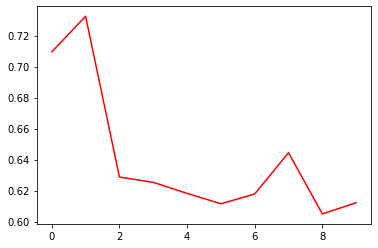

In [24]:
plt.plot(model.history.history['val_loss'], 'r')

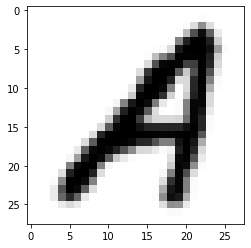

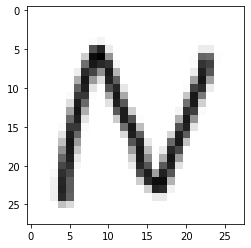

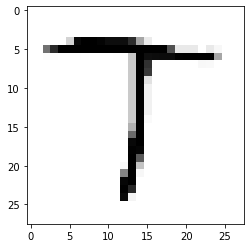

In [25]:
n1 = img_to_data("img/n.png",28)
r1 = img_to_data("img/r.png",28)
t1 = img_to_data("img/t.png",28)


ass = np.array([n1,r1,t1])
ass = ass.reshape((ass.shape[0], 28*28))
t_images_reshaped = t_images.reshape((t_images.shape[0], 28*28))

show_char(t_images[1])
show_char(n1)
show_char(t1)

['n']


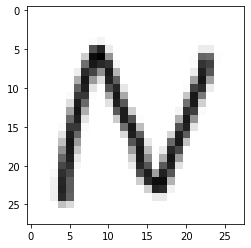

['r']


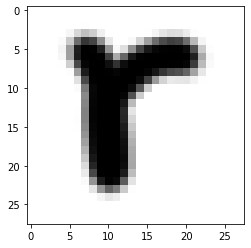

['t']


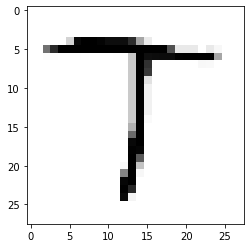

['a']


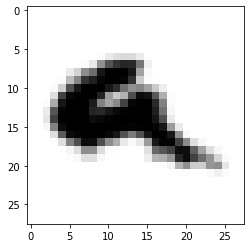

In [26]:
pred = model.predict(t_images_reshaped)
pred2 = model.predict(ass)

print(alph_res(pred2[0]))
show_char(n1)
print(alph_res(pred2[1]))
show_char(r1)
print(alph_res(pred2[2]))
show_char(t1)

print(alph_res(pred[0]))
show_char(t_images[0])

In [28]:
model.save('../static/models/letters_model.h5py')